Question: How much are nearby Hospitals and Ambulatory Surgical Centers (surgery centers) paid for the same procedure / in the same area?

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  


import seaborn as sns

In [2]:
%matplotlib inline

d1 = Medicare Provider Utilization and Payment Data: Physician and Other Supplier PUF CY2017

In [3]:
pd.read_csv(
        'c:/users/erinm/Documents/healthcare-bluebook-green-team/data/Medicare_Provider_Utilization_and_Payment_Data__Physician_and_Other_Supplier_PUF_CY2017.tsv', sep='\t').dtypes
#d1.columns

C:\Users\erinm\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


National Provider Identifier                                  int64
Last Name/Organization Name of the Provider                  object
First Name of the Provider                                   object
Middle Initial of the Provider                               object
Credentials of the Provider                                  object
Gender of the Provider                                       object
Entity Type of the Provider                                  object
Street Address 1 of the Provider                             object
Street Address 2 of the Provider                             object
City of the Provider                                         object
Zip Code of the Provider                                     object
State Code of the Provider                                   object
Country Code of the Provider                                 object
Provider Type                                                object
Medicare Participation Indicator                

Note: for now, I only read in National Provider Identifer (and not all the NPI subcolumns, like name, address, etc., since I figured those could be brought in later if we are interested.)

In [4]:
d1=pd.read_csv(
        'c:/users/erinm/Documents/healthcare-bluebook-green-team/data/Medicare_Provider_Utilization_and_Payment_Data__Physician_and_Other_Supplier_PUF_CY2017.tsv', 
        sep='\t',
        usecols=['National Provider Identifier', 'Entity Type of the Provider', 'Provider Type', 'Place of Service', 'HCPCS Code', 'HCPCS Description', 'Number of Distinct Medicare Beneficiary/Per Day Services', 'Average Medicare Allowed Amount']
)
d1.shape

(9847443, 8)

In [5]:
d1.head()

,National Provider Identifier,Entity Type of the Provider,Provider Type,Place of Service,HCPCS Code,HCPCS Description,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount
0,1003000126,I,Internal Medicine,F,99217,Hospital observation care discharge,100,73.398800
1,1003000126,I,Internal Medicine,F,99218,Hospital observation care typically 30 minutes,26,100.080000
2,1003000126,I,Internal Medicine,F,99219,Hospital observation care typically 50 minutes,52,136.380000
3,1003000126,I,Internal Medicine,F,99220,Hospital observation care typically 70 minutes...,59,190.363729
4,1003000126,I,Internal Medicine,F,99221,"Initial hospital inpatient care, typically 30 ...",16,101.680000


d2 = Provider Outpatient Hospital Charge Data by APC, CY2017

In [6]:
d2 = pd.read_csv(
    'c:/users/erinm/Documents/healthcare-bluebook-green-team/data/Provider_Outpatient_Hospital_Charge_Data_by_APC__CY2017.tsv', 
    sep='\t',
    usecols=['Provider_ID','APC','APC_Desc', 'Beneficiaries', 'CAPC_Services','Average_Medicare_Allowed_Amount']
)
d2.shape

(61779, 6)

In [7]:
d2.head()

,Provider_ID,APC,APC_Desc,Beneficiaries,CAPC_Services,Average_Medicare_Allowed_Amount
0,10001,5072,Level 2 Excision/ Biopsy/ Incision and Drainage,249.0,259,1038.45
1,10001,5073,Level 3 Excision/ Biopsy/ Incision and Drainage,52.0,53,1792.60
2,10001,5091,Level 1 Breast/Lymphatic Surgery and Related P...,26.0,27,2113.58
3,10001,5092,Level 2 Breast/Lymphatic Surgery and Related P...,23.0,23,3737.14
4,10001,5112,Level 2 Musculoskeletal Procedures,17.0,17,1029.46


In [8]:
d2.columns

Index(['Provider_ID', 'APC', 'APC_Desc', 'Beneficiaries', 'CAPC_Services',
       'Average_Medicare_Allowed_Amount'],
      dtype='object')

d3 = APC to CPT/HCPCS crosswalk (Jan 2020 Addendum B)

In [9]:
d3 = pd.read_excel('c:/users/erinm/Documents/healthcare-bluebook-green-team/data/2020_january_web_addendum_b.12312019.xlsx',usecols=[0,1,3], skiprows=2)
d3.head()

,HCPCS Code,Short Descriptor,APC
0,00100,Anesth salivary gland,NaN
1,00102,Anesth repair of cleft lip,NaN
2,00103,Anesth blepharoplasty,NaN
3,00104,Anesth electroshock,NaN
4,00120,Anesth ear surgery,NaN


d4 = Zip to CBSA crosswalk (Q1 2020)

In [10]:
d4 = pd.read_excel('c:/users/erinm/documents/healthcare-bluebook-green-team/data/ZIP_CBSA_032020.xlsx', dtype={'ZIP':'str'})
d4.head()

,ZIP,CBSA,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
0,00501,35620,0.0,1.0,0.0,1.0
1,00601,38660,1.0,1.0,1.0,1.0
2,00602,10380,1.0,1.0,1.0,1.0
3,00603,10380,1.0,1.0,1.0,1.0
4,00604,10380,1.0,1.0,1.0,1.0


Inner join provider payment data (d1) with APC to HCPCS crosswalk (d3) on HCPCS Code.

In [11]:
d1_d3 = pd.merge(d1, d3, on=('HCPCS Code'), how='inner')
d1_d3.shape

(9502517, 10)

In [12]:
d1_d3.head()

,National Provider Identifier,Entity Type of the Provider,Provider Type,Place of Service,HCPCS Code,HCPCS Description,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Short Descriptor,APC
0,1003000126,I,Internal Medicine,F,99217,Hospital observation care discharge,100,73.3988,Observation care discharge,NaN
1,1003000407,I,Family Practice,F,99217,Hospital observation care discharge,15,72.3000,Observation care discharge,NaN
2,1003006586,I,Internal Medicine,F,99217,Hospital observation care discharge,53,82.0900,Observation care discharge,NaN
3,1003007824,I,Internal Medicine,F,99217,Hospital observation care discharge,12,79.6300,Observation care discharge,NaN
4,1003008590,I,Internal Medicine,F,99217,Hospital observation care discharge,28,75.7300,Observation care discharge,NaN


Rename columns.

In [13]:
d1_d3.columns

Index(['National Provider Identifier', 'Entity Type of the Provider',
       'Provider Type', 'Place of Service', 'HCPCS Code', 'HCPCS Description',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Short Descriptor', 'APC '],
      dtype='object')

In [14]:
d1_d3.columns=['NPI', 
              'Entity Type', 
              'Provider Type', 
              'Place of Service', 
              'HCPCS Code', 
              'HCPCS Desc', 
              'No. Distinct Medicare Beneficiaries Per Day Services', 
              'Avg Medicare Amt Allowed', 
              'APC Desc', 
              'APC']
d1_d3.columns

Index(['NPI', 'Entity Type', 'Provider Type', 'Place of Service', 'HCPCS Code',
       'HCPCS Desc', 'No. Distinct Medicare Beneficiaries Per Day Services',
       'Avg Medicare Amt Allowed', 'APC Desc', 'APC'],
      dtype='object')

Remove entries with nans in APC Code field.

In [15]:
d1_d3_nn=d1_d3[d1_d3['APC'].notnull()]
d1_d3_nn.shape

(4016376, 10)

***Note: Tried to do the following but got memory error, so am moving join to after filters imposed.  

Full join d1_d3_nn (provider payment data (d1) with APC to HCPCS crosswalk (d3) on HCPCS Code) with Outpatient Charge data (d2) on APC.

In [16]:
d1_d3_nn.dtypes

NPI                                                       int64
Entity Type                                              object
Provider Type                                            object
Place of Service                                         object
HCPCS Code                                               object
HCPCS Desc                                               object
No. Distinct Medicare Beneficiaries Per Day Services      int64
Avg Medicare Amt Allowed                                float64
APC Desc                                                 object
APC                                                     float64
dtype: object

From PowerPoint: 

"Physician/Other Supplier Data Filters - pulling ASCs
entity type = 'O'
Provider Type = Ambulatory Surgical Center
CPT = 43249
Hospital Outpatient
APC = 5302
Knowing what they get paid for an APC, we can tell what they get paid for a procedure.
Compare results within a CBSA (what is a)"

Create filters:
filter1 = entity type (I or O)
filter2 = HCPCS Code
filter3 = provider type

In [17]:
filter1 = d1_d3_nn['Entity Type'].isin(['O'])
filter2 = d1_d3_nn['HCPCS Code'].isin(['43249'])
filter3 = d1_d3_nn['Provider Type'].isin(['Ambulatory Surgical Center'])

F1_F2_F3 = d1_d3_nn[filter1 & filter2 & filter3]
F1_F2_F3.shape

(616, 10)

In [18]:
F1_F2_F3.head()

,NPI,Entity Type,Provider Type,Place of Service,HCPCS Code,HCPCS Desc,No. Distinct Medicare Beneficiaries Per Day Services,Avg Medicare Amt Allowed,APC Desc,APC
7529288,1003015843,O,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,20,814.53450,Esoph egd dilation <30 mm,5302.0
7529292,1003079187,O,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,17,555.31000,Esoph egd dilation <30 mm,5302.0
7529293,1003220187,O,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,94,596.51000,Esoph egd dilation <30 mm,5302.0
7529297,1003815242,O,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,446,509.85778,Esoph egd dilation <30 mm,5302.0
7529307,1003887225,O,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,26,576.83000,Esoph egd dilation <30 mm,5302.0


Confirming that Place of Service is uniform.

In [19]:
F1_F2_F3['Place of Service'].value_counts()

F    616
Name: Place of Service, dtype: int64

***Note: again tried to merge with d2 but am getting memory error.  Tried to limit with nrows (like Taylor suggested with a read_csv) but this does not work with the merge function.  Need to troubleshoot.

In [20]:
#F1_F2_F3_with_d2= pd.merge(d1_d3_nn, d2, on=('APC'), how='inner')
#F1_F2_F3_with_d2.shape

Assign new filters to d1_d3_nn.  Filters relate to our choice to look at hip replacements.  Know that APC code is [5112, 5113, 5114, 5115, 5116], which are various levels of muskoskeletal procedures.  Look at HCPCS within those APCs to find hip replacement code.

In [21]:
filter4 = d1_d3_nn['APC'].isin([5112, 5113, 5114, 5115, 5116])

F4 = d1_d3_nn[filter4]
F4.shape

(60478, 10)

In [22]:
F4['HCPCS Code'].value_counts()

27447    11213
27130     6780
63047     5039
29827     3593
26055     2678
         ...  
20693        1
23585        1
25300        1
23473        1
28585        1
Name: HCPCS Code, Length: 390, dtype: int64

In [23]:
F4['HCPCS Desc'].value_counts()

Repair of knee joint                                                                 11807
Replacement of thigh bone and hip joint prosthesis                                    6780
Partial removal of middle spine bone with release of spinal cord and/or nerves        5047
Repair of shoulder rotator cuff using an endoscope                                    3593
Incision of tendon covering                                                           2678
                                                                                     ...  
Shortening of tendon of hand or finger                                                   1
Fusion of thumb at wrist with bone graft                                                 1
Open treatment of broken wrist                                                           1
Insertion of needles or catheters into muscle and/or tissue for radiation therapy        1
Reconstruction of knee joint ligaments                                                   1

In [24]:
F5 = d1_d3_nn[d1_d3_nn['HCPCS Desc'].str.contains('hip')]

F5.shape

(63853, 10)

In [25]:
F5.head()

,NPI,Entity Type,Provider Type,Place of Service,HCPCS Code,HCPCS Desc,No. Distinct Medicare Beneficiaries Per Day Services,Avg Medicare Amt Allowed,APC Desc,APC
4902359,1003001785,I,Orthopedic Surgery,O,73502,"X-ray of hip with pelvis, 2-3 views",24,26.91,X-ray exam hip uni 2-3 views,5521.0
4902360,1003002148,I,Diagnostic Radiology,F,73502,"X-ray of hip with pelvis, 2-3 views",39,11.19,X-ray exam hip uni 2-3 views,5521.0
4902361,1003002809,I,Diagnostic Radiology,O,73502,"X-ray of hip with pelvis, 2-3 views",89,47.39,X-ray exam hip uni 2-3 views,5521.0
4902362,1003006636,I,Diagnostic Radiology,F,73502,"X-ray of hip with pelvis, 2-3 views",27,11.39,X-ray exam hip uni 2-3 views,5521.0
4902363,1003013129,I,Interventional Radiology,F,73502,"X-ray of hip with pelvis, 2-3 views",30,12.04,X-ray exam hip uni 2-3 views,5521.0


In [26]:
F5['HCPCS Desc'].value_counts()

X-ray of hip with pelvis, 2-3 views                                                           39763
X-ray of hip with pelvis, 1 view                                                               6817
Replacement of thigh bone and hip joint prosthesis                                             6780
X-ray of both hips with pelvis, 2 views                                                        3797
X-ray of both hips with pelvis, 3-4 views                                                      3629
X-ray of both hips with pelvis, minimum of 5 views                                             1929
X-ray of hip with pelvis, minimum of 4 views                                                    713
Radiological supervision and interpretation X-ray of hip joint                                  250
Strapping of hip                                                                                 66
Removal or shaving of hip joint socket cartilage using an endoscope                              12


In [27]:
F5['APC'].value_counts()

5521.0    46580
5522.0    10068
5115.0     6780
5572.0      250
5733.0       66
5114.0       35
5113.0       35
5112.0       18
5111.0        9
5073.0        6
5072.0        4
5102.0        1
5054.0        1
Name: APC, dtype: int64

In [28]:
F5['APC Desc'].value_counts()

X-ray exam hip uni 2-3 views    39763
X-ray exam hip uni 1 view        6817
Total hip arthroplasty           6780
X-ray exam hips bi 2 views       3797
X-ray exam hips bi 3-4 views     3629
X-ray exam hips bi 5/> views     1929
X-ray exam hip uni 4/> views      713
Contrast x-ray of hip             250
Strapping of hip                   66
Incision of hip tendon             15
Hip arthr0 w/debridement           12
Hip arthro w/femoroplasty          11
Incision of hip tendons            10
Pelvis/hip joint surgery            8
Drainage of pelvis lesion           7
Hip arthro w/labral repair          6
Remove hip bone les deep            6
Manipulation of hip joint           6
Hip arthr0 w/synovectomy            5
Biopsy of soft tissues              4
Exc hip/pelv tum deep < 5 cm        2
Exc hip/pelv tum deep 5 cm/>        2
Transfer of spinal muscle           2
Hip arthro acetabuloplasty          2
Exploration of hip joint            2
Resect hip/pelv tum 5 cm/>          1
Remove thigh

If we want hip replacements, I think our best bet is the following, which has 6780 occurrances in the dataset 1: HCPCS Code = 27130, APC Code = 5115, APC Desc on dataset 2 = Level 5 Musculoskeletal Procedure, APC Short Desc on crosswalk = Total Hip Arthroplasty.

In [29]:
filter6 = d1_d3_nn['APC Desc'].isin(['Total hip arthroplasty'])

F6 = d1_d3_nn[filter6]
F6.shape

(6780, 10)

In [30]:
F6.head()

,NPI,Entity Type,Provider Type,Place of Service,HCPCS Code,HCPCS Desc,No. Distinct Medicare Beneficiaries Per Day Services,Avg Medicare Amt Allowed,APC Desc,APC
6748341,1003006115,I,Physician Assistant,F,27130,Replacement of thigh bone and hip joint prosth...,14,230.510000,Total hip arthroplasty,5115.0
6748342,1003017682,I,Orthopedic Surgery,F,27130,Replacement of thigh bone and hip joint prosth...,22,1376.500000,Total hip arthroplasty,5115.0
6748343,1003018086,I,Orthopedic Surgery,F,27130,Replacement of thigh bone and hip joint prosth...,15,1339.390000,Total hip arthroplasty,5115.0
6748344,1003029034,I,Orthopedic Surgery,F,27130,Replacement of thigh bone and hip joint prosth...,35,1260.513714,Total hip arthroplasty,5115.0
6748345,1003044033,I,Orthopedic Surgery,F,27130,Replacement of thigh bone and hip joint prosth...,14,1283.370000,Total hip arthroplasty,5115.0


Confirming that entity type is uniform.  Confirmed.  All are "I".

In [31]:
F6['Entity Type'].value_counts()

I    6780
Name: Entity Type, dtype: int64

Confirming that Place of Service is uniform.  No.  8 occurrances are 'O'.  Need to remove those.

In [32]:
F6['Place of Service'].value_counts()

F    6772
O       8
Name: Place of Service, dtype: int64

In [39]:
Filter7 = F6['Place of Service'].isin(['O'])

F7 = F6[Filter7]
F7.shape

(8, 10)

In [40]:
F7.head(20)

,NPI,Entity Type,Provider Type,Place of Service,HCPCS Code,HCPCS Desc,No. Distinct Medicare Beneficiaries Per Day Services,Avg Medicare Amt Allowed,APC Desc,APC
6748862,1083604086,I,Orthopedic Surgery,O,27130,Replacement of thigh bone and hip joint prosth...,15,1273.230000,Total hip arthroplasty,5115.0
6750039,1245410497,I,Orthopedic Surgery,O,27130,Replacement of thigh bone and hip joint prosth...,16,1329.290000,Total hip arthroplasty,5115.0
6751086,1407285737,I,Physician Assistant,O,27130,Replacement of thigh bone and hip joint prosth...,20,186.390000,Total hip arthroplasty,5115.0
6751901,1528202074,I,Orthopedic Surgery,O,27130,Replacement of thigh bone and hip joint prosth...,13,1249.532857,Total hip arthroplasty,5115.0
6752316,1588778658,I,Orthopedic Surgery,O,27130,Replacement of thigh bone and hip joint prosth...,11,1316.540000,Total hip arthroplasty,5115.0
6753515,1770531626,I,Orthopedic Surgery,O,27130,Replacement of thigh bone and hip joint prosth...,19,1329.290000,Total hip arthroplasty,5115.0
6753660,1790751675,I,Physician Assistant,O,27130,Replacement of thigh bone and hip joint prosth...,38,186.390000,Total hip arthroplasty,5115.0
6755049,1992107767,I,Nurse Practitioner,O,27130,Replacement of thigh bone and hip joint prosth...,14,186.390000,Total hip arthroplasty,5115.0


Trying for a third time to merge with dataframe 2.  This time is works for me.

In [34]:
F7_with_d2= pd.merge(F7, d2, on=('APC'), how='inner')
F7_with_d2.shape

(8742652, 15)

In [35]:
F7_with_d2.head(25)

,NPI,Entity Type,Provider Type,Place of Service,HCPCS Code,HCPCS Desc,No. Distinct Medicare Beneficiaries Per Day Services,Avg Medicare Amt Allowed,APC Desc,APC,Provider_ID,APC_Desc,Beneficiaries,CAPC_Services,Average_Medicare_Allowed_Amount
0,1003006115,I,Physician Assistant,F,27130,Replacement of thigh bone and hip joint prosth...,14,230.51,Total hip arthroplasty,5115.0,10001,Level 5 Musculoskeletal Procedures,59.0,59,8078.53
1,1003006115,I,Physician Assistant,F,27130,Replacement of thigh bone and hip joint prosth...,14,230.51,Total hip arthroplasty,5115.0,10005,Level 5 Musculoskeletal Procedures,25.0,25,8321.96
2,1003006115,I,Physician Assistant,F,27130,Replacement of thigh bone and hip joint prosth...,14,230.51,Total hip arthroplasty,5115.0,10006,Level 5 Musculoskeletal Procedures,15.0,16,7624.83
3,1003006115,I,Physician Assistant,F,27130,Replacement of thigh bone and hip joint prosth...,14,230.51,Total hip arthroplasty,5115.0,10011,Level 5 Musculoskeletal Procedures,21.0,22,7993.85
4,1003006115,I,Physician Assistant,F,27130,Replacement of thigh bone and hip joint prosth...,14,230.51,Total hip arthroplasty,5115.0,10016,Level 5 Musculoskeletal Procedures,15.0,15,7845.45
5,1003006115,I,Physician Assistant,F,27130,Replacement of thigh bone and hip joint prosth...,14,230.51,Total hip arthroplasty,5115.0,10023,Level 5 Musculoskeletal Procedures,50.0,52,7809.26
6,1003006115,I,Physician Assistant,F,27130,Replacement of thigh bone and hip joint prosth...,14,230.51,Total hip arthroplasty,5115.0,10024,Level 5 Musculoskeletal Procedures,74.0,74,7288.50
7,1003006115,I,Physician Assistant,F,27130,Replacement of thigh bone and hip joint prosth...,14,230.51,Total hip arthroplasty,5115.0,10029,Level 5 Musculoskeletal Procedures,21.0,22,8410.24
8,1003006115,I,Physician Assistant,F,27130,Replacement of thigh bone and hip joint prosth...,14,230.51,Total hip arthroplasty,5115.0,10033,Level 5 Musculoskeletal Procedures,44.0,45,7872.50
9,1003006115,I,Physician Assistant,F,27130,Replacement of thigh bone and hip joint prosth...,14,230.51,Total hip arthroplasty,5115.0,10035,Level 5 Musculoskeletal Procedures,18.0,19,8910.95


In [36]:
F7_with_d2.columns

Index(['NPI', 'Entity Type', 'Provider Type', 'Place of Service', 'HCPCS Code',
       'HCPCS Desc', 'No. Distinct Medicare Beneficiaries Per Day Services',
       'Avg Medicare Amt Allowed', 'APC Desc', 'APC', 'Provider_ID',
       'APC_Desc', 'Beneficiaries', 'CAPC_Services',
       'Average_Medicare_Allowed_Amount'],
      dtype='object')

In [69]:
F7_with_d2['Provider Type'].value_counts()

Orthopedic Surgery                     5498369
Physician Assistant                    2876348
Nurse Practitioner                      278856
Sports Medicine                          25820
General Surgery                          21947
Family Practice                          14201
Osteopathic Manipulative Medicine         7746
Certified Clinical Nurse Specialist       6455
General Practice                          3873
Cardiology                                1291
Emergency Medicine                        1291
Thoracic Surgery                          1291
Internal Medicine                         1291
Podiatry                                  1291
Obstetrics & Gynecology                   1291
Anesthesiology                            1291
Name: Provider Type, dtype: int64

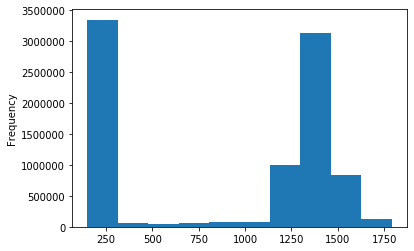

In [70]:
F7_with_d2['Avg Medicare Amt Allowed'].plot.hist()

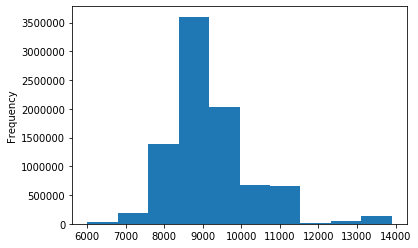

In [71]:
F7_with_d2['Average_Medicare_Allowed_Amount'].plot.hist()

In [37]:
all_tables=pd.merge(d1_d3_nn, d4, on=

SyntaxError: unexpected EOF while parsing (<ipython-input-37-c5414e3650a1>, line 1)

Filters for Physician/Other Supplier
Entity Type = I
Place of Service = O
HCPCS = 99213 (or any office visit – 99211-99215 / 99201-99205)
